In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/ref_adv,G/ref_dom,G/ref_trts,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:01:05,100,100000,0.067292,0.041003,0.007643,0.016981,0.049640,0.007120,0.377569,...,0.509383,461.505646,193.974930,0.289910,0.218083,2.804458,0.000319,0.0,0.0,0.0
1,0:01:44,200,100000,0.004888,0.057174,0.004940,0.001639,0.034028,0.005804,1.102044,...,0.410883,37.114784,75.913704,0.143199,0.107861,1.093860,0.000191,0.0,0.0,0.0
2,0:02:20,300,100000,0.000085,0.004719,0.004305,0.000013,0.004621,0.004534,0.499843,...,0.542726,71.152946,51.441036,0.083308,0.060563,0.518896,0.000124,0.0,0.0,0.0
3,0:02:56,400,100000,0.039049,0.025054,0.078623,0.003552,0.010505,0.062132,0.197542,...,0.348717,62.275269,23.864475,0.057603,0.048219,0.455993,0.000087,0.0,0.0,0.0
4,0:03:33,500,100000,0.089035,0.001502,0.012192,0.004095,0.034311,0.013507,0.588438,...,0.506007,50.637772,54.754150,0.061034,0.057036,0.644021,0.000070,0.0,0.0,0.0


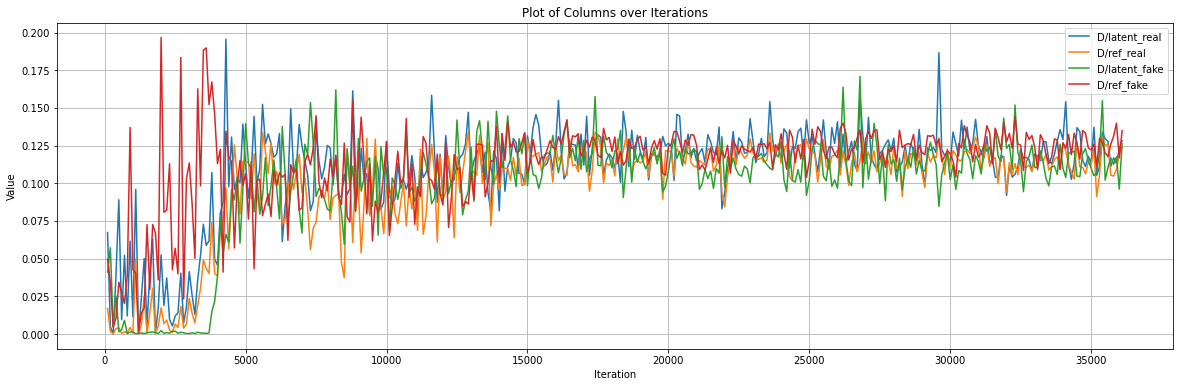

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

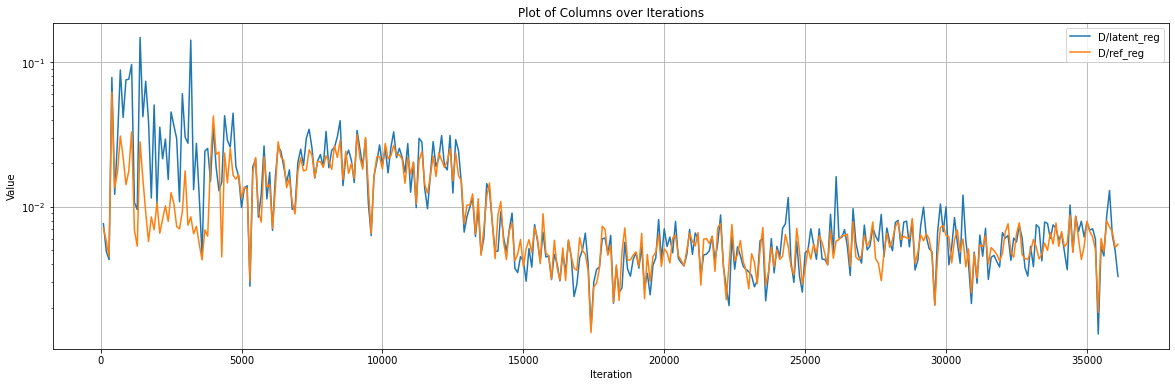

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

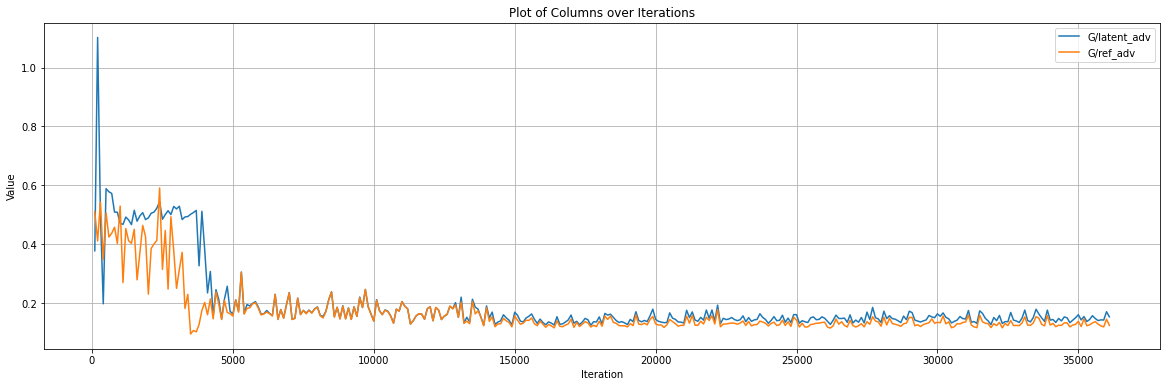

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

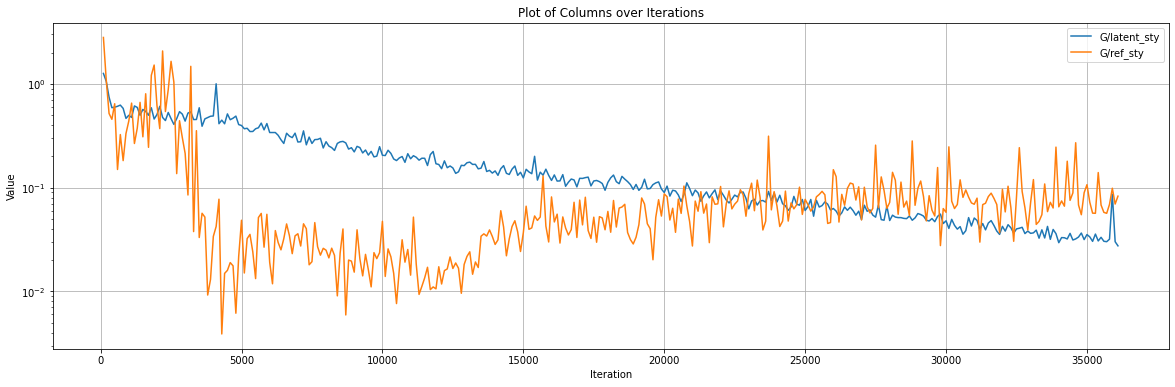

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

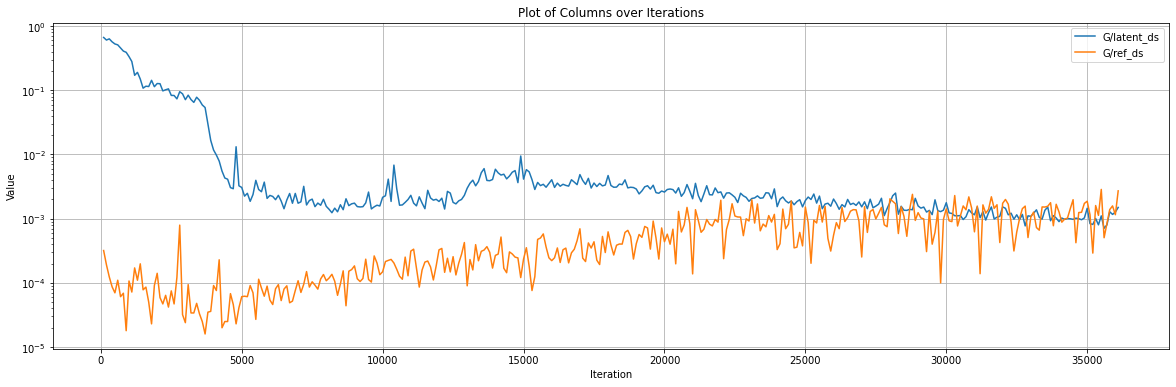

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

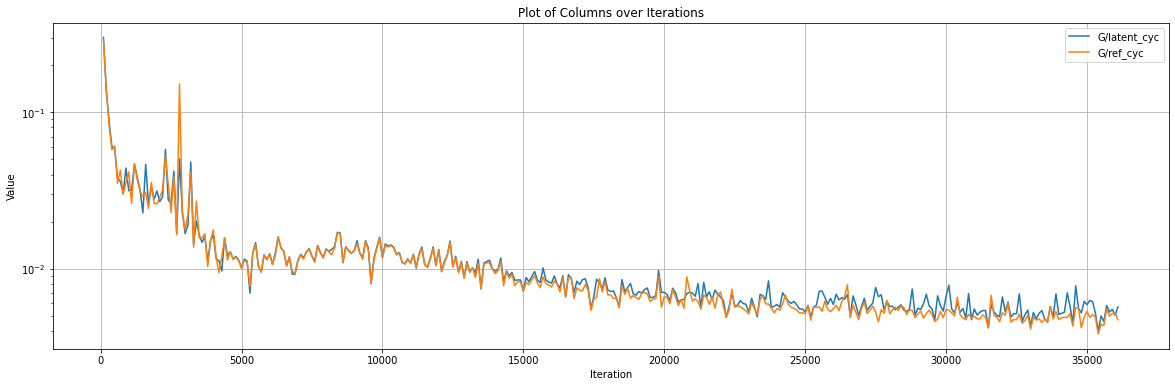

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

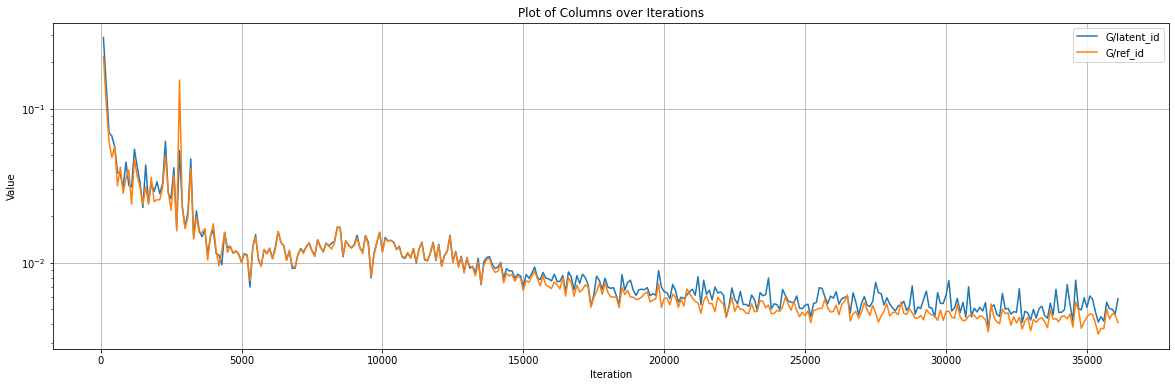

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

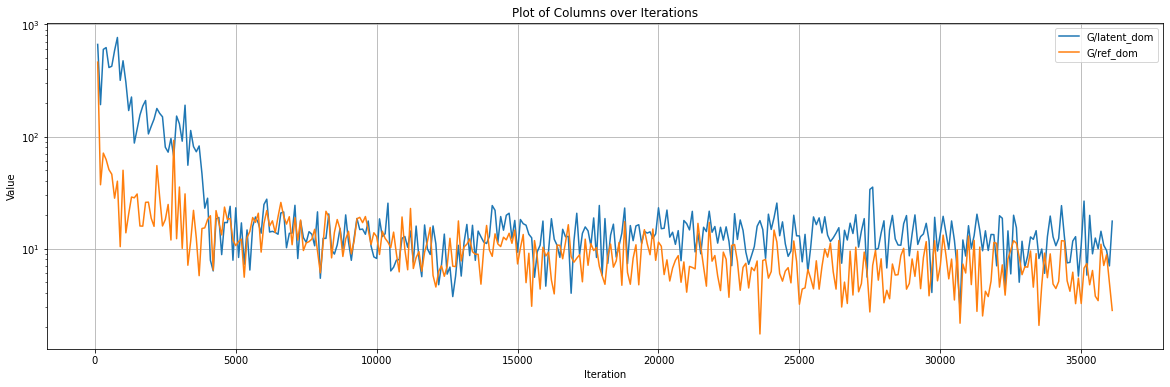

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

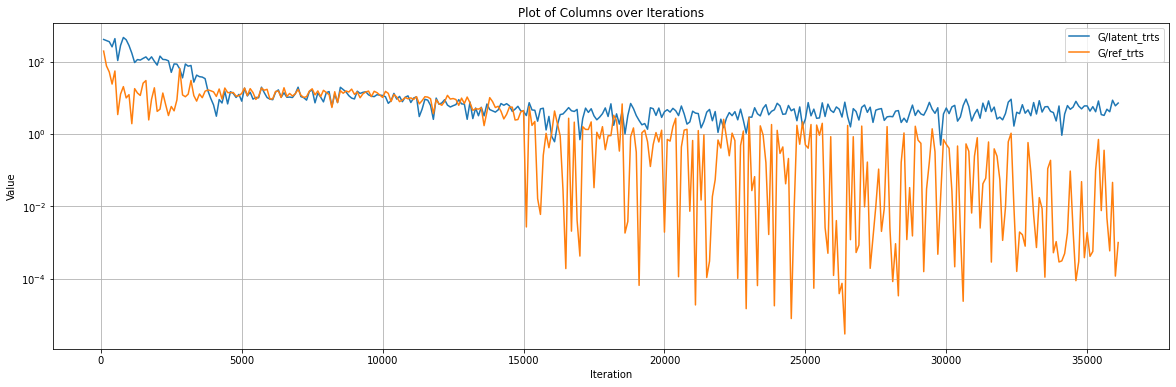

In [12]:
plot_columns(history, ['G/latent_trts', 'G/ref_trts'], logaxis=True)

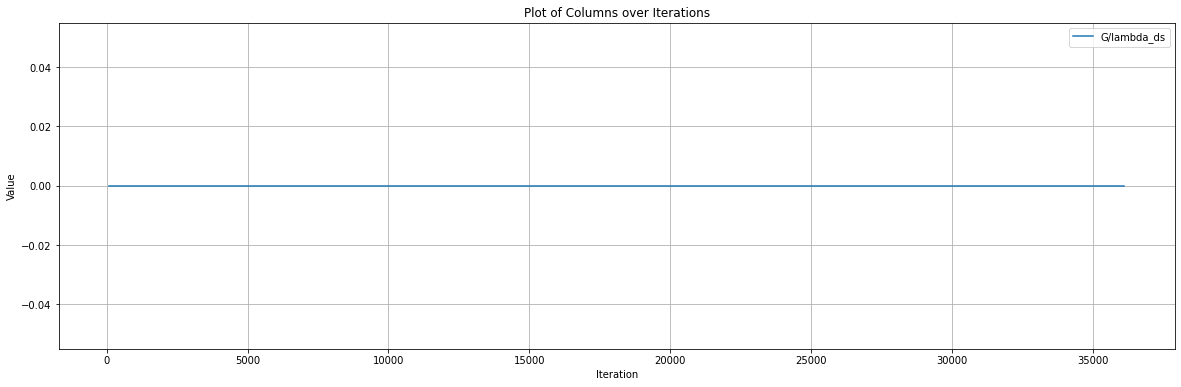

In [13]:
plot_columns(history, ['G/lambda_ds'])

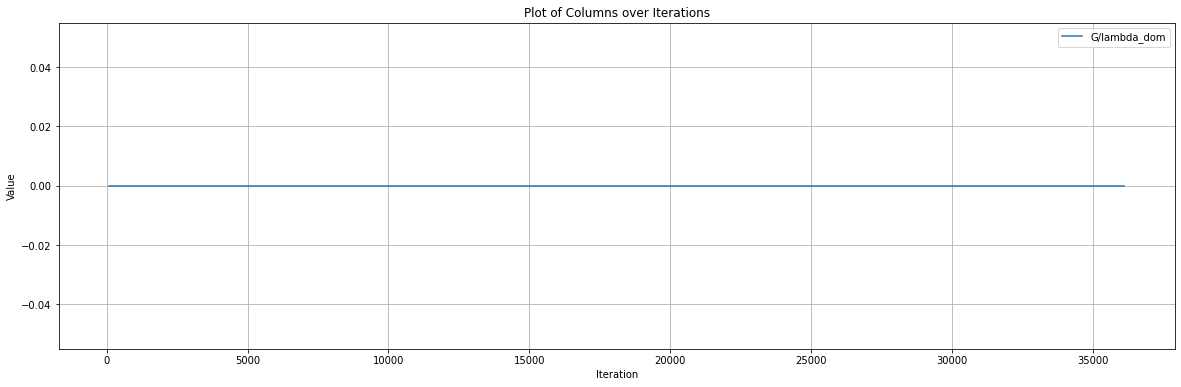

In [14]:
plot_columns(history, ['G/lambda_dom'])

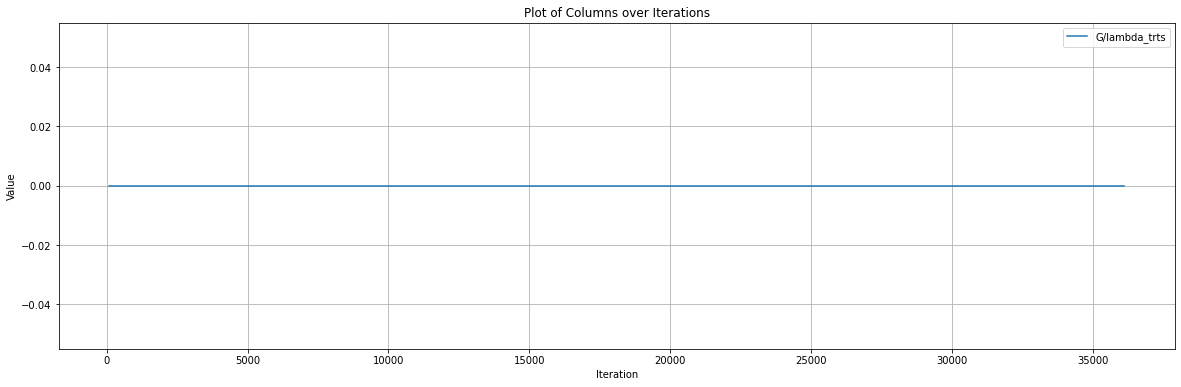

In [15]:
plot_columns(history, ['G/lambda_trts'])

# Metrics

In [16]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,target,domain,accuracy,loss
0,2000,latent,IR,OR_opposite,4,0.249475,4.718495
1,2000,latent,IR,OR_opposite,5,0.249869,3.982632
2,2000,latent,IR,OR_opposite,6,0.249738,2.701934
3,2000,latent,IR,OR_opposite,7,0.250394,3.992568
4,2000,latent,Ball,OR_opposite,4,0.266667,2.345832


Maximum accuracy for Ball in latent mode: 0.3163 at step 18000
Maximum accuracy for IR in latent mode: 0.3781 at step 12000
Maximum accuracy for OR_centred in latent mode: 0.5135 at step 14000
Maximum accuracy for OR_opposite in latent mode: 0.3895 at step 18000
Maximum accuracy for OR_orthogonal in latent mode: 0.4714 at step 18000


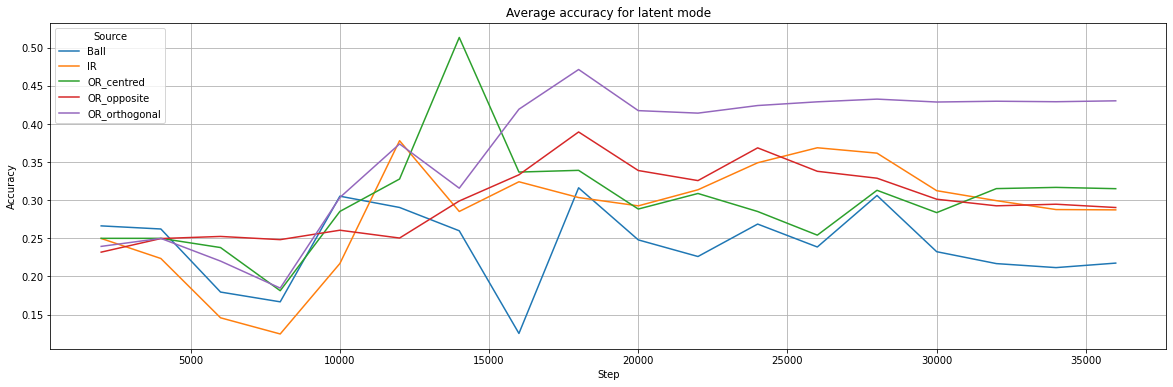

Maximum accuracy for Ball in reference mode: 0.3353 at step 24000
Maximum accuracy for IR in reference mode: 0.4715 at step 20000
Maximum accuracy for OR_centred in reference mode: 0.3756 at step 20000
Maximum accuracy for OR_opposite in reference mode: 0.4604 at step 36000
Maximum accuracy for OR_orthogonal in reference mode: 0.4488 at step 20000


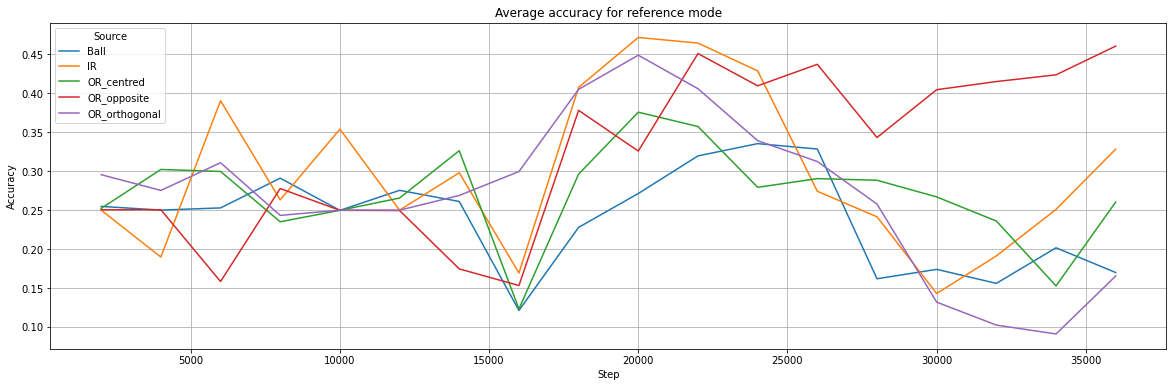

Minimum loss for Ball in latent mode: 3.0409 at step 2000
Minimum loss for IR in latent mode: 3.8277 at step 8000
Minimum loss for OR_centred in latent mode: 3.0083 at step 2000
Minimum loss for OR_opposite in latent mode: 3.1994 at step 6000
Minimum loss for OR_orthogonal in latent mode: 2.3453 at step 2000


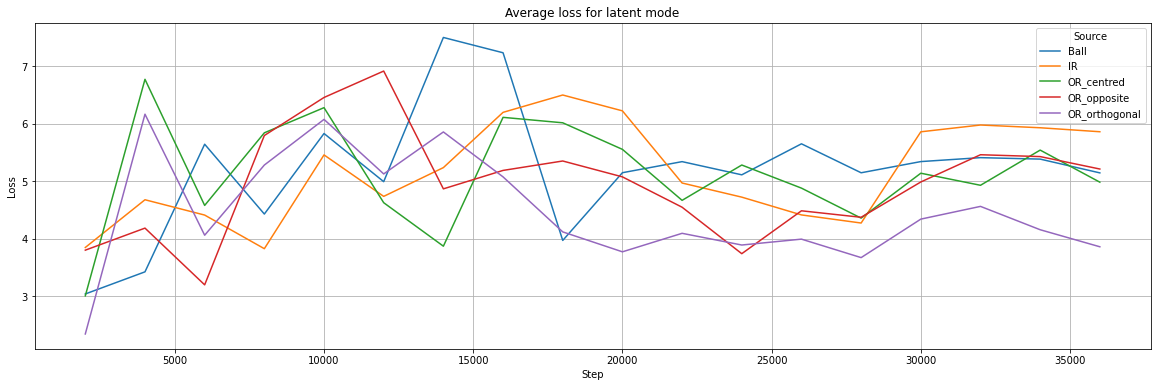

Minimum loss for Ball in reference mode: 4.1283 at step 24000
Minimum loss for IR in reference mode: 3.7894 at step 22000
Minimum loss for OR_centred in reference mode: 3.7468 at step 14000
Minimum loss for OR_opposite in reference mode: 3.0123 at step 32000
Minimum loss for OR_orthogonal in reference mode: 2.3102 at step 2000


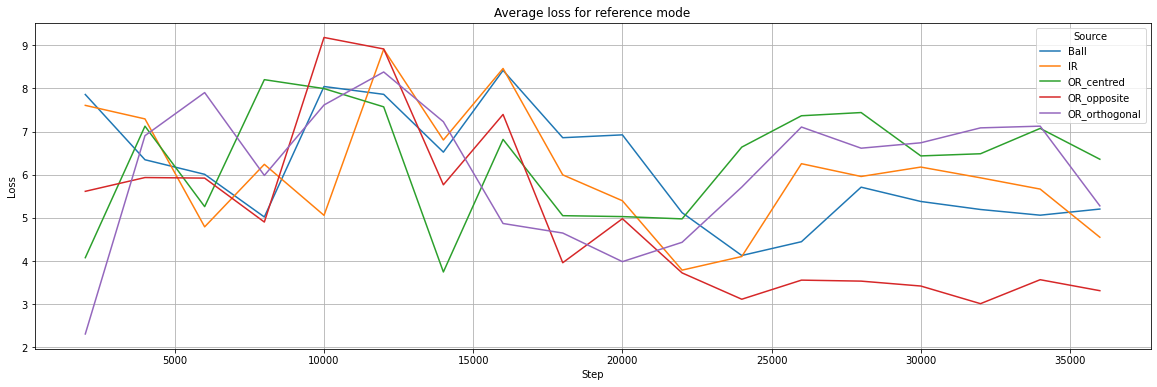

In [17]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for Ball: 0.3020 at step 24000
Maximum accuracy for IR: 0.3890 at step 22000
Maximum accuracy for OR_centred: 0.4198 at step 14000
Maximum accuracy for OR_opposite: 0.3891 at step 24000
Maximum accuracy for OR_orthogonal: 0.4382 at step 18000


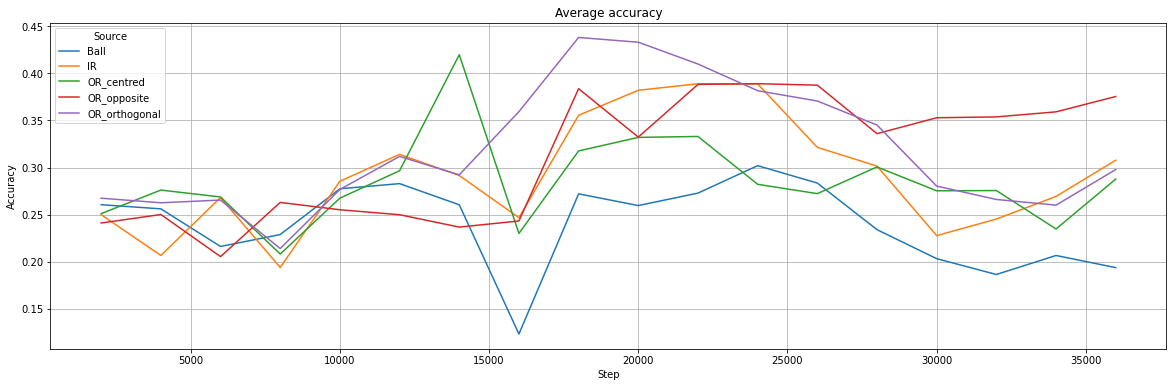

Minimum loss for Ball: 4.6200 at step 24000
Minimum loss for IR: 4.3793 at step 22000
Minimum loss for OR_centred: 3.5430 at step 2000
Minimum loss for OR_opposite: 3.4281 at step 24000
Minimum loss for OR_orthogonal: 2.3278 at step 2000


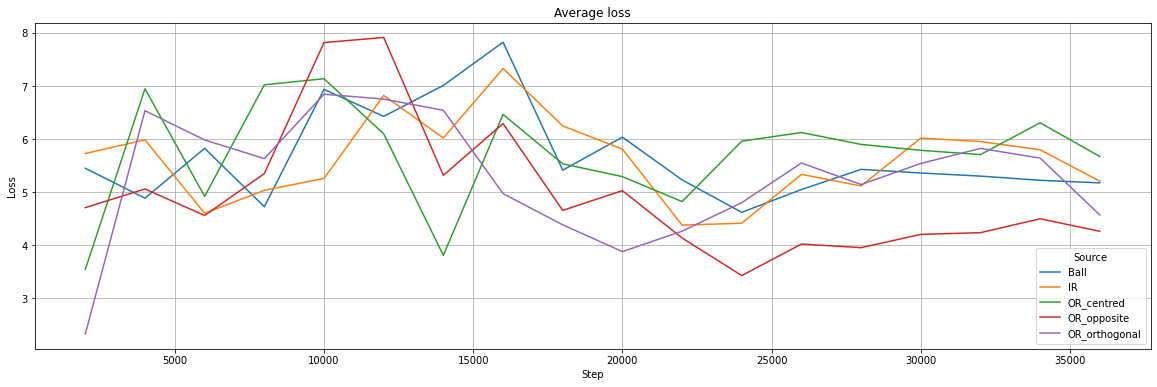

In [18]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.3640 at step 18000
Max in reference mode: 0.3995 at step 22000


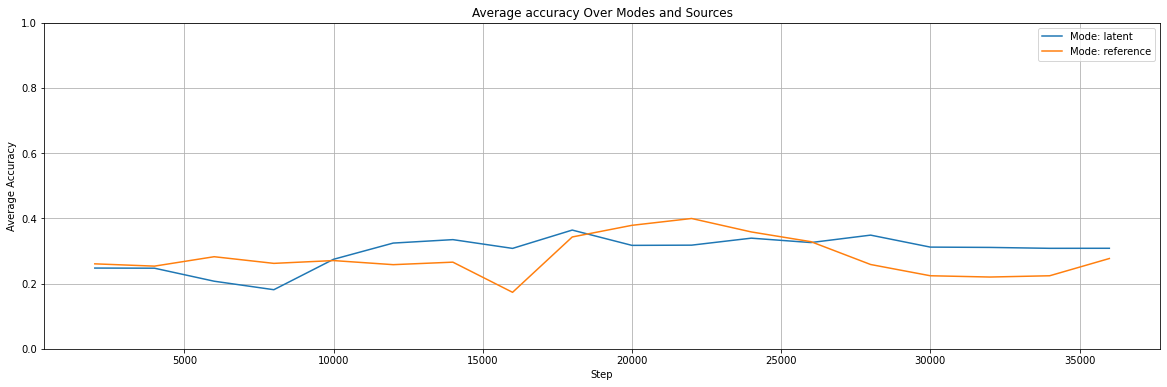

Min in latent mode: 3.2091 at step 2000
Min in reference mode: 4.4093 at step 22000


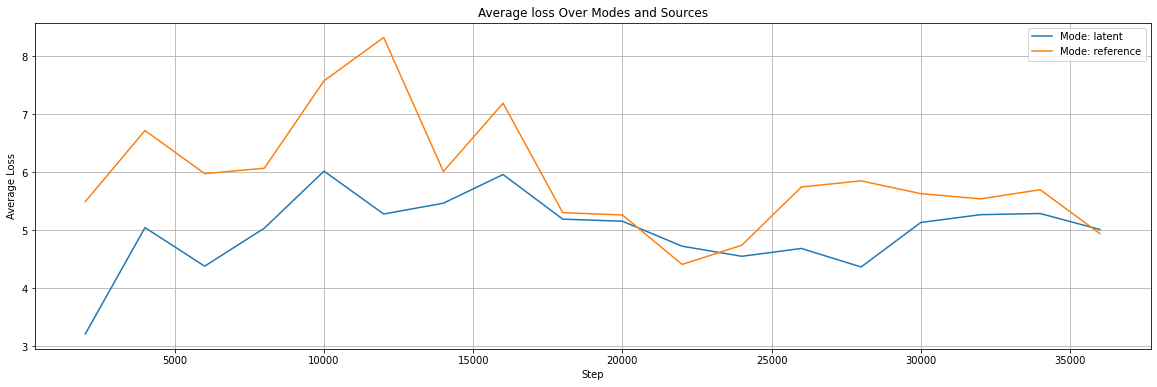

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

In [20]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,2000,latent,IR,Ball,0.240273,6.594267
1,2000,latent,IR,OR_centred,0.230284,4.814381
2,2000,latent,IR,OR_orthogonal,0.243428,4.044433
3,2000,latent,IR,OR_opposite,0.263933,6.248178
4,2000,latent,Ball,IR,0.243570,5.582771


Maximum accuracy in latent mode: 0.3205 at step 14000


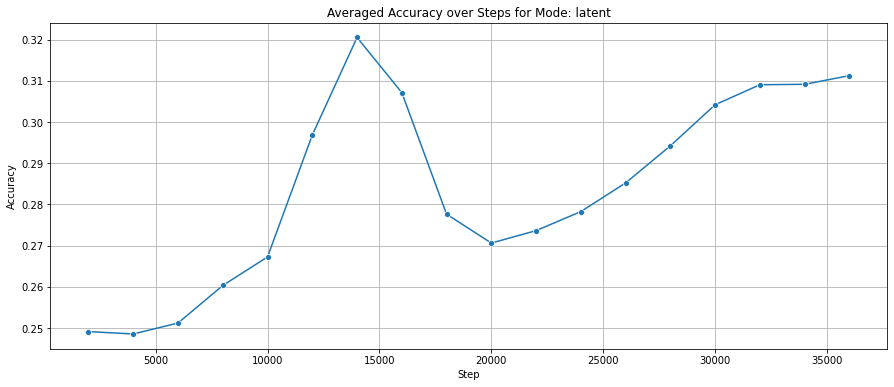

Maximum accuracy in reference mode: 0.3406 at step 36000


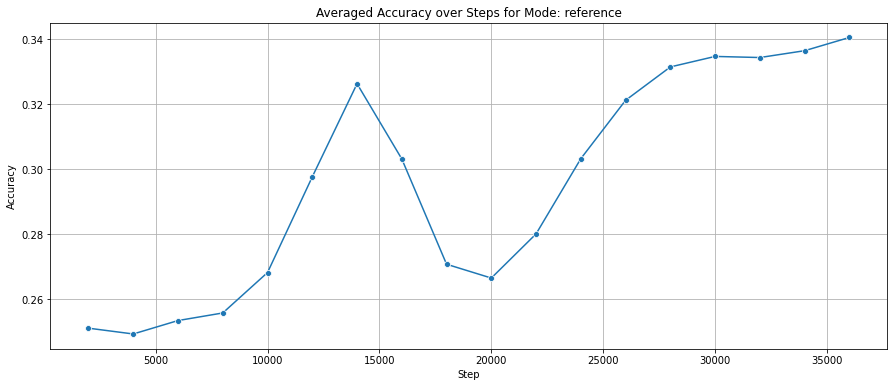

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')